In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Обзор данных

In [4]:
orders =  pd.read_csv('orders.csv')

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5009 non-null   int64  
 1   order_date   5009 non-null   object 
 2   ship_mode    5009 non-null   object 
 3   customer_id  5009 non-null   object 
 4   sales        5009 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.8+ KB


In [6]:
orders.head()

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376


In [7]:
orders.ship_mode.unique()

array(['Standard', 'Second', 'First', 'Same Day'], dtype=object)

In [14]:
display(orders['order_date'].min())
display(orders['order_date'].max())

'2014-01-03'

'2017-12-30'

customer_id
EP-13915    17
SH-19975    13
EA-14035    13
ZC-21910    13
JE-15745    13
CK-12205    13
NS-18640    13
PG-18820    13
RP-19390    12
HG-14965    12
Name: id, dtype: int64

<AxesSubplot:>

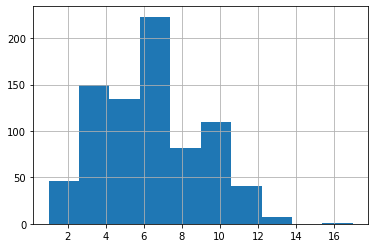

In [25]:
display(orders.groupby('customer_id')['id'].count().sort_values(ascending = False).head(10))
orders.groupby('customer_id')['id'].count().hist()

In [15]:
customers =  pd.read_csv('customers.csv')

In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       793 non-null    object
 1   name     793 non-null    object
 2   segment  793 non-null    object
 3   state    793 non-null    object
 4   city     793 non-null    object
dtypes: object(5)
memory usage: 31.1+ KB


In [17]:
customers.head()

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord


In [20]:
display(customers.segment.unique())
display(customers.state.unique())
display(customers.city.unique())

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'Oregon', 'Colorado', 'Iowa', 'Ohio', 'Missouri',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey',
       'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Maryland', 'District of Columbia',
       'Kansas', 'New Hampshire', 'South Dakota'], dtype=object)

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Memphis', 'Decatur', 'Durham', 'Rochester',
       'Minneapolis', 'Portland', 'Saint Paul', 'Aurora', 'Charlotte',
       'Orland Park', 'Urbandale', 'Columbus', 'Bristol', 'Wilmington',
       'Bloomington', 'Phoenix', 'Roseville', 'Independence', 'Pasadena',
       'Newark', 'Franklin', 'Scottsdale', 'San Jose', 'Edmond',
       'Carlsbad', 'San Antonio', 'Monroe', 'Fairfield', 'Grand Prairie',
       'Redlands', 'Hamilton', 'Westfield', 'Akron', 'Denver', 'Dallas',
       'Whittier', 'Saginaw', 'Medina', 'Dublin', 'Detroit', 'Columbia',
       'Santa Clara', 'Lakeville', 'San Diego', 'Brentwood',
       'Chapel Hill', 'Cincinna

# Создание когорт

In [27]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [30]:
orders['order_month'] = orders['order_date'].dt.strftime('%Y-%m') 

In [31]:
orders.head(3)

,id,order_date,ship_mode,customer_id,sales,order_month
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03


In [32]:
cohorts= orders.groupby('customer_id',as_index=False)['order_month'].min()
cohorts.rename(columns = {'order_month':'cohort'},inplace=True)
cohorts.head(5)

,customer_id,cohort
0,AA-10315,2014-03
1,AA-10375,2014-04
2,AA-10480,2014-05
3,AA-10645,2014-06
4,AB-10015,2014-02


In [36]:
orders_cogorts= pd.merge(orders,cohorts , how='left', on='customer_id')
orders_cogorts.head()

,id,order_date,ship_mode,customer_id,sales,order_month,cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,2014-04


In [37]:
orders_cogorts_customer = pd.merge(orders_cogorts,customers, how='left', left_on='customer_id', right_on = 'id')
orders_cogorts_customer.head()

,id_x,order_date,ship_mode,customer_id,sales,order_month,cohort,id_y,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014-09,DK-13375,Dennis Kane,Consumer,Ohio,Marion
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,2014-07,EB-13705,Ed Braxton,Corporate,Ohio,Akron
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,2014-03,NF-18475,Neil Franzosisch,Home Office,Illinois,Rockford
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,2014-01,JC-15340,Jasper Cacioppo,Consumer,California,Los Angeles
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,2014-04,JM-15655,Jim Mitchum,Corporate,New Jersey,Bridgeton


# Подготовка к анализу

In [57]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [70]:
def retention_calc(df, figx=16,figy=10):
    '''
    Calc retention and show heat map
    '''
    cohorts_group = df.groupby(['cohort', 'order_month']).agg({'customer_id': pd.Series.nunique})
    cohorts_group.rename(columns={'customer_id': 'TotalUsers', 'id_x': 'TotalOrders'}, inplace=True)
    cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
    cohorts_group.reset_index(inplace=True)
    cohorts_group.set_index(['cohort', 'CohortPeriod'], inplace=True) 
    cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
    user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
    
    sns.set(style='white')
    plt.figure(figsize=(figx, figy))
    plt.title('Cohorts: User Retention')
    sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.1g');
    
    return user_retention

In [43]:
df = orders_cogorts_customer.copy()

cohort,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2016-10,2016-11,2016-12,2017-03,2017-04,2017-06,2017-07,2017-09,2017-10,2017-11
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,0.09375,0.166667,0.061538,0.107143,0.089286,0.020833,0.136364,0.163265,0.132353,0.071429,...,1.0,0.166667,0.5,0.333333,NaN,1.0,0.5,NaN,NaN,NaN
2,0.06250,0.083333,0.030769,0.035714,0.089286,0.041667,0.113636,0.061224,0.132353,0.119048,...,1.0,0.166667,0.5,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
3,0.06250,0.041667,0.123077,0.071429,0.071429,0.083333,0.113636,0.224490,0.161765,0.023810,...,1.0,0.166667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06250,0.083333,0.107692,0.053571,0.178571,0.041667,0.181818,0.102041,0.014706,0.071429,...,1.0,0.166667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
5,0.12500,0.083333,0.107692,0.142857,0.035714,0.187500,0.045455,0.061224,0.029412,0.095238,...,1.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.15625,0.125000,0.076923,0.107143,0.214286,0.166667,0.181818,0.081633,0.132353,0.119048,...,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.09375,0.125000,0.123077,0.160714,0.178571,0.020833,0.045455,0.040816,0.147059,0.095238,...,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.21875,0.166667,0.092308,0.142857,0.071429,0.083333,0.159091,0.081633,0.132353,0.071429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


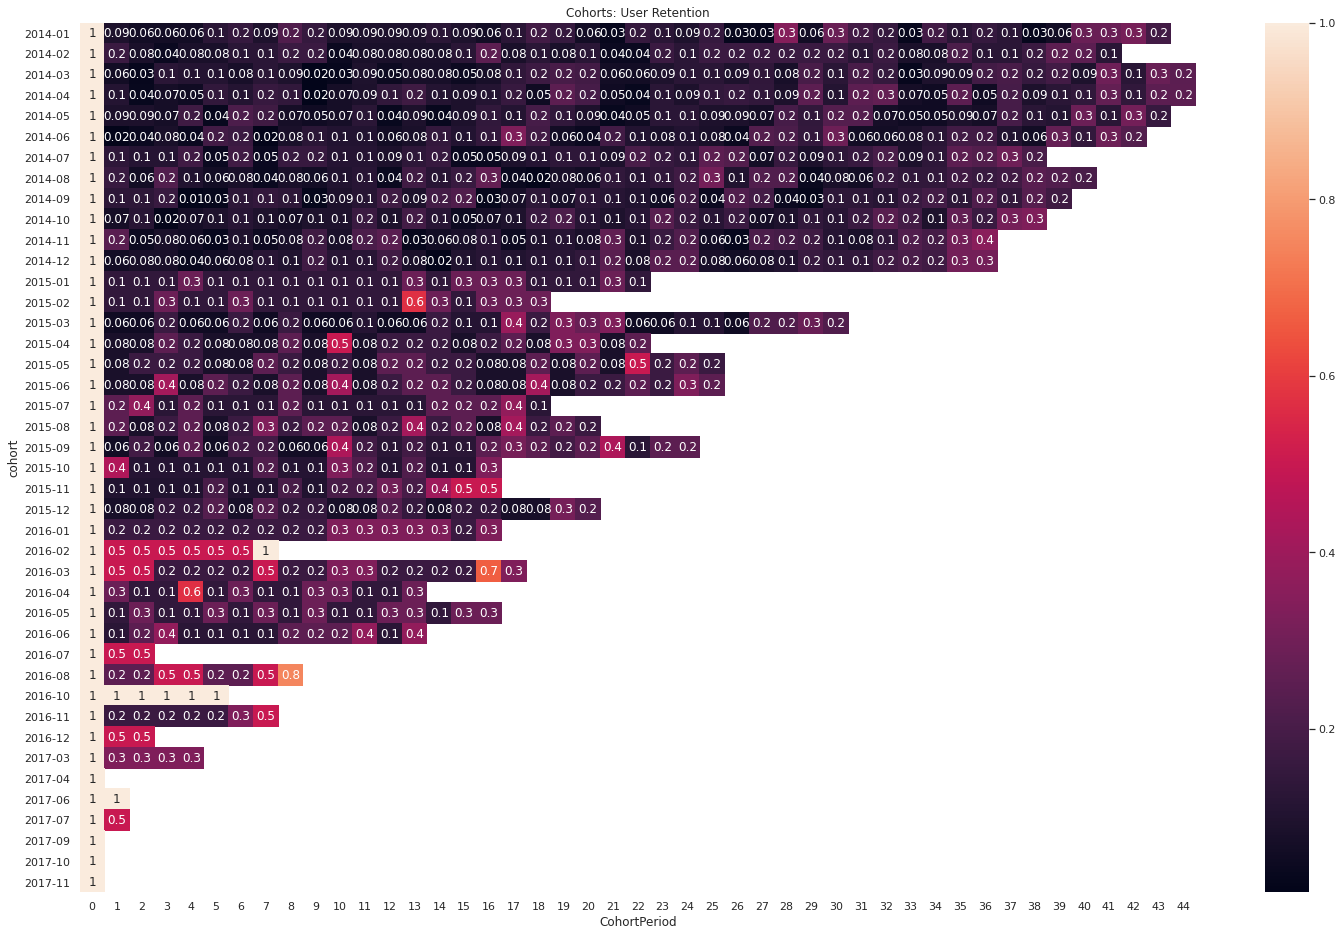

In [72]:
retention_calc(df,figx=25,figy=16)

# Анализ

## Пользователи из когорт 2016 и 2017 годов:

(Отвечаем на сколько сейчас все хуже, чем в прошлом году? )

cohort,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-10,2016-11,2016-12,2017-03,2017-04,2017-06,2017-07,2017-09,2017-10,2017-11
CohortPeriod,,,,,,,,,,,,,,,,,,
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000,1.0,1.00,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,0.166667,0.5,0.500000,0.285714,0.142857,0.125,0.5,0.25,1.0,0.166667,0.5,0.333333,NaN,1.0,0.5,NaN,NaN,NaN
2,0.166667,0.5,0.500000,0.142857,0.285714,0.250,0.5,0.25,1.0,0.166667,0.5,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
3,0.166667,0.5,0.166667,0.142857,0.142857,0.375,NaN,0.50,1.0,0.166667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
4,0.166667,0.5,0.166667,0.571429,0.142857,0.125,NaN,0.50,1.0,0.166667,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
5,0.166667,0.5,0.166667,0.142857,0.285714,0.125,NaN,0.25,1.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.166667,0.5,0.166667,0.285714,0.142857,0.125,NaN,0.25,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.166667,1.0,0.500000,0.142857,0.285714,0.125,NaN,0.50,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.166667,NaN,0.166667,0.142857,0.142857,0.250,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


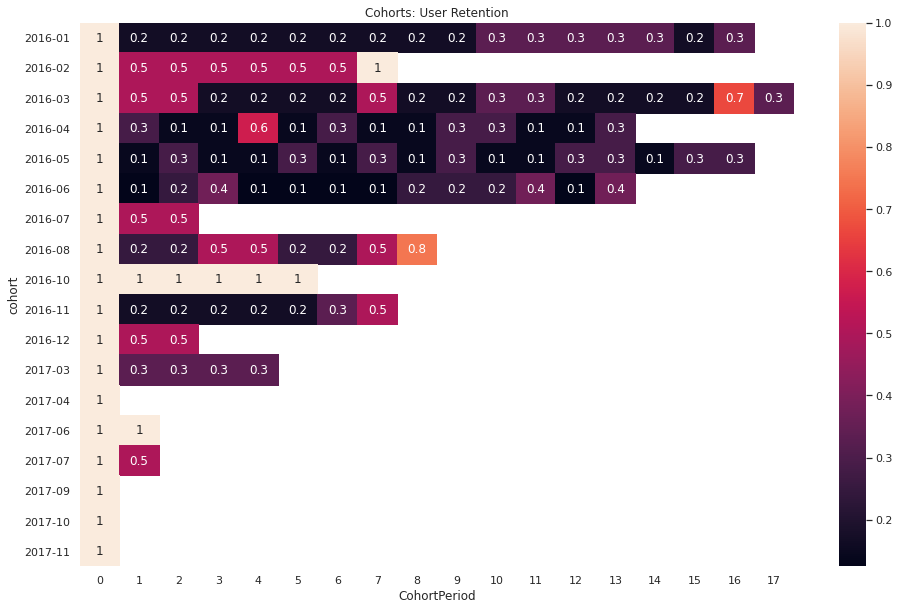

In [73]:
retention_calc(df[df['cohort'].str.contains('2017|2016')])

Пользователи в 2017 году не совершали первых заказов в 2017-01, 2017-02. Видимо у нас были какие-то проблемы  
В 2016 аналогичная проблема в 2016-09

Вижу, что пользователи в 2017-10, 2017-09 не вернулись за покупками. Другие пользователи в когортах 2017 года возвращались слабо, кроме пользователей 2017-03  
В 2017-06 вернулись все на следующий месяц. Маркетинговая компания была?


## Отдельные виды доставок

'Standard', 'Second', 'First', 'Same Day'

### Standart 

cohort,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2016-07,2016-08,2016-10,2016-11,2016-12,2017-03,2017-06,2017-07,2017-09,2017-10
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.052632,0.200000,0.046512,0.105263,0.055556,0.037037,0.142857,0.200000,0.093023,0.1250,...,1.0,0.5,1.0,0.2,1.0,1.0,1.0,0.5,NaN,NaN
2,0.052632,0.066667,0.023256,0.052632,0.083333,0.111111,0.142857,0.033333,0.162791,0.2500,...,NaN,0.5,1.0,0.2,NaN,1.0,NaN,NaN,NaN,NaN
3,0.105263,0.066667,0.162791,0.078947,0.083333,0.074074,0.107143,0.200000,0.139535,0.0625,...,NaN,1.0,1.0,0.2,NaN,1.0,NaN,NaN,NaN,NaN
4,0.105263,0.066667,0.046512,0.052632,0.166667,0.259259,0.178571,0.100000,0.023256,0.0625,...,NaN,1.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN
5,0.157895,0.066667,0.139535,0.105263,0.055556,0.148148,0.071429,0.033333,0.023256,0.1250,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.105263,0.133333,0.069767,0.131579,0.222222,0.037037,0.142857,0.100000,0.093023,0.3125,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.263158,0.066667,0.116279,0.131579,0.138889,0.074074,0.071429,0.033333,0.186047,0.1875,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.263158,0.133333,0.069767,0.105263,0.111111,0.148148,0.178571,0.033333,0.186047,0.0625,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


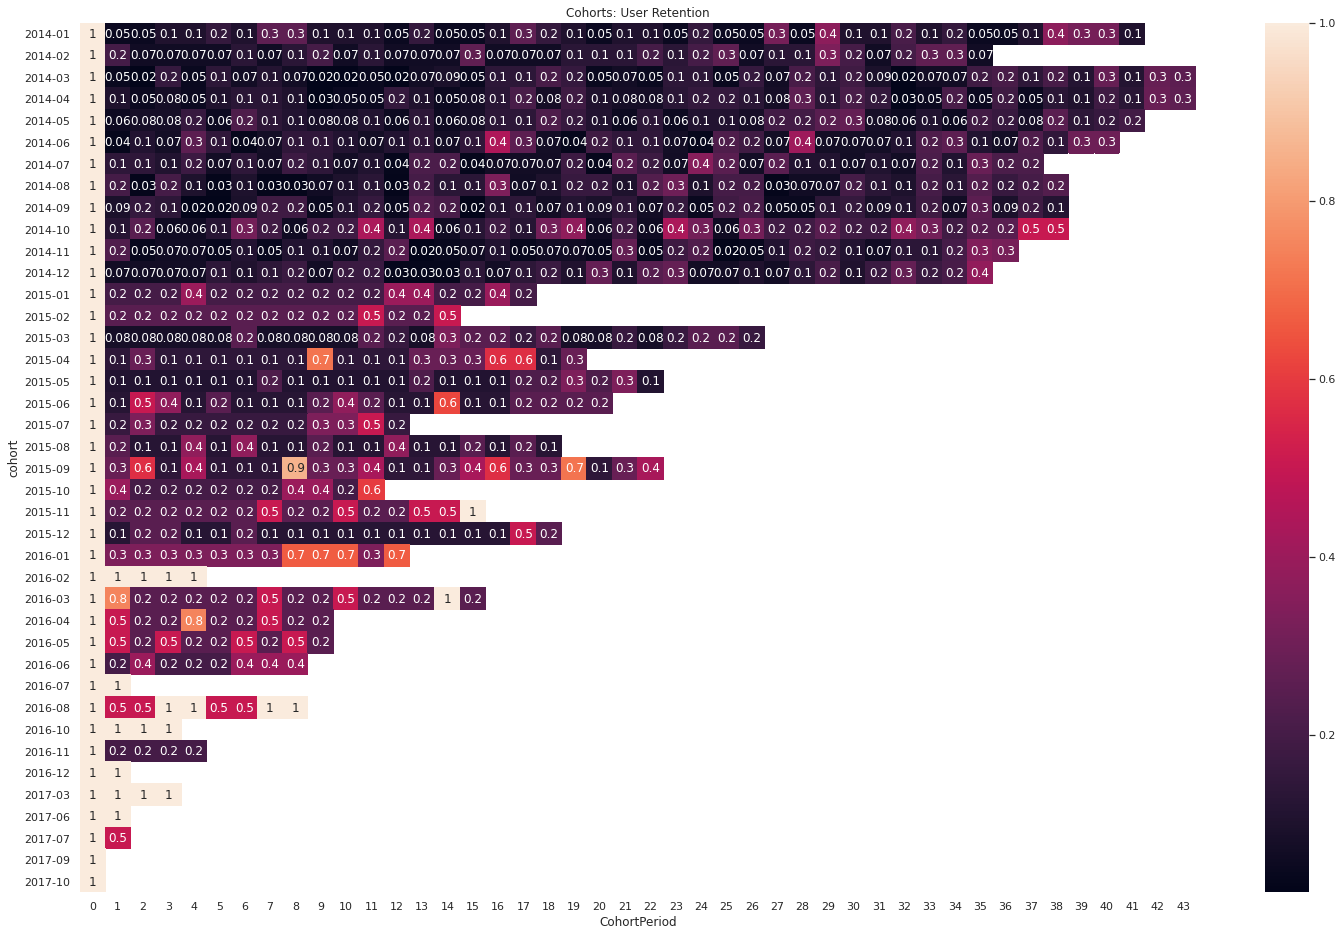

In [100]:
retention_calc(df[df['cohort'].str.contains('2017|2016|2015|2014') & (df['ship_mode'] == 'Standard') ],figx=25,figy=16 )

В стандартной доставке с начала 2015 года ретеншн увеличился немного. 

cohort,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-10,2016-11,2016-12,2017-03,2017-06,2017-07,2017-09,2017-10
CohortPeriod,,,,,,,,,,,,,,,,
0,1.000000,1.0,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.333333,1.0,0.75,0.50,0.50,0.2,1.0,0.5,1.0,0.2,1.0,1.0,1.0,0.5,NaN,NaN
2,0.333333,1.0,0.25,0.25,0.25,0.4,NaN,0.5,1.0,0.2,NaN,1.0,NaN,NaN,NaN,NaN
3,0.333333,1.0,0.25,0.25,0.50,0.2,NaN,1.0,1.0,0.2,NaN,1.0,NaN,NaN,NaN,NaN
4,0.333333,1.0,0.25,0.75,0.25,0.2,NaN,1.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN
5,0.333333,NaN,0.25,0.25,0.25,0.2,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.333333,NaN,0.25,0.25,0.50,0.4,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.333333,NaN,0.50,0.50,0.25,0.4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.666667,NaN,0.25,0.25,0.50,0.4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


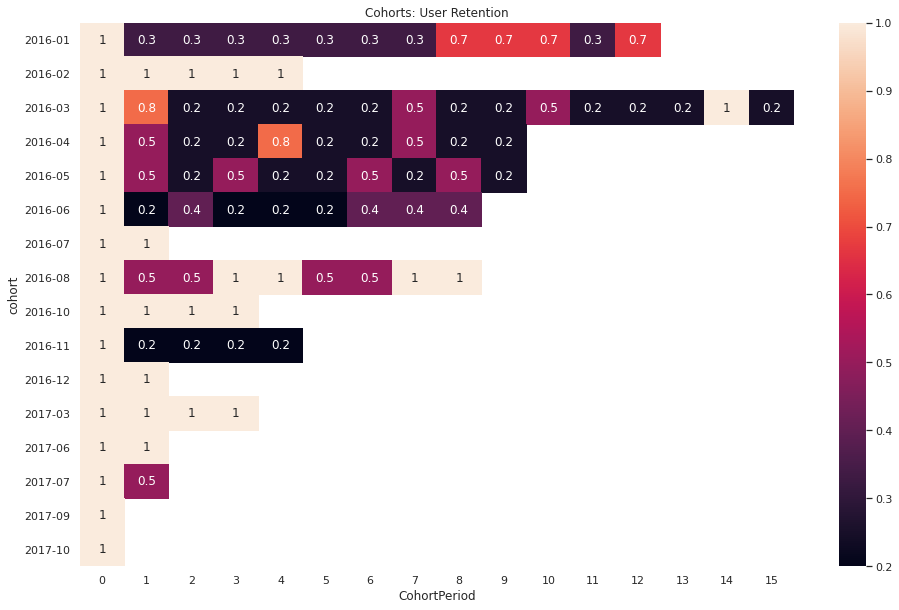

In [109]:
retention_calc(df[df['cohort'].str.contains('2017|2016') & (df['ship_mode'] == 'Standard') ])

В стандартной доставке в 2016 и 2017 годах ретенш примерно такой же как среди всех видов доставок

### Second

cohort,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2016-05,2016-06,2016-07,2016-08,2016-10,2016-11,2016-12,2017-03,2017-04,2017-11
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.500000,0.666667,0.214286,0.222222,0.125,0.090909,0.333333,0.166667,0.153846,0.071429,...,1.0,0.5,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
2,0.166667,0.333333,0.071429,0.111111,0.125,0.090909,0.166667,0.166667,0.076923,0.071429,...,2.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.333333,0.333333,0.214286,0.222222,0.125,0.090909,0.500000,0.166667,0.307692,0.071429,...,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.166667,0.333333,0.071429,0.111111,0.250,0.090909,0.333333,0.166667,0.076923,0.142857,...,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.166667,0.333333,0.071429,0.111111,0.250,0.090909,0.333333,0.083333,0.307692,0.071429,...,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.333333,0.333333,0.214286,0.111111,0.125,0.181818,0.500000,0.083333,0.076923,0.071429,...,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.166667,0.333333,0.142857,0.111111,0.250,0.090909,0.333333,0.166667,0.153846,0.071429,...,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.166667,0.333333,0.071429,0.333333,0.125,0.090909,0.333333,0.083333,0.230769,0.071429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


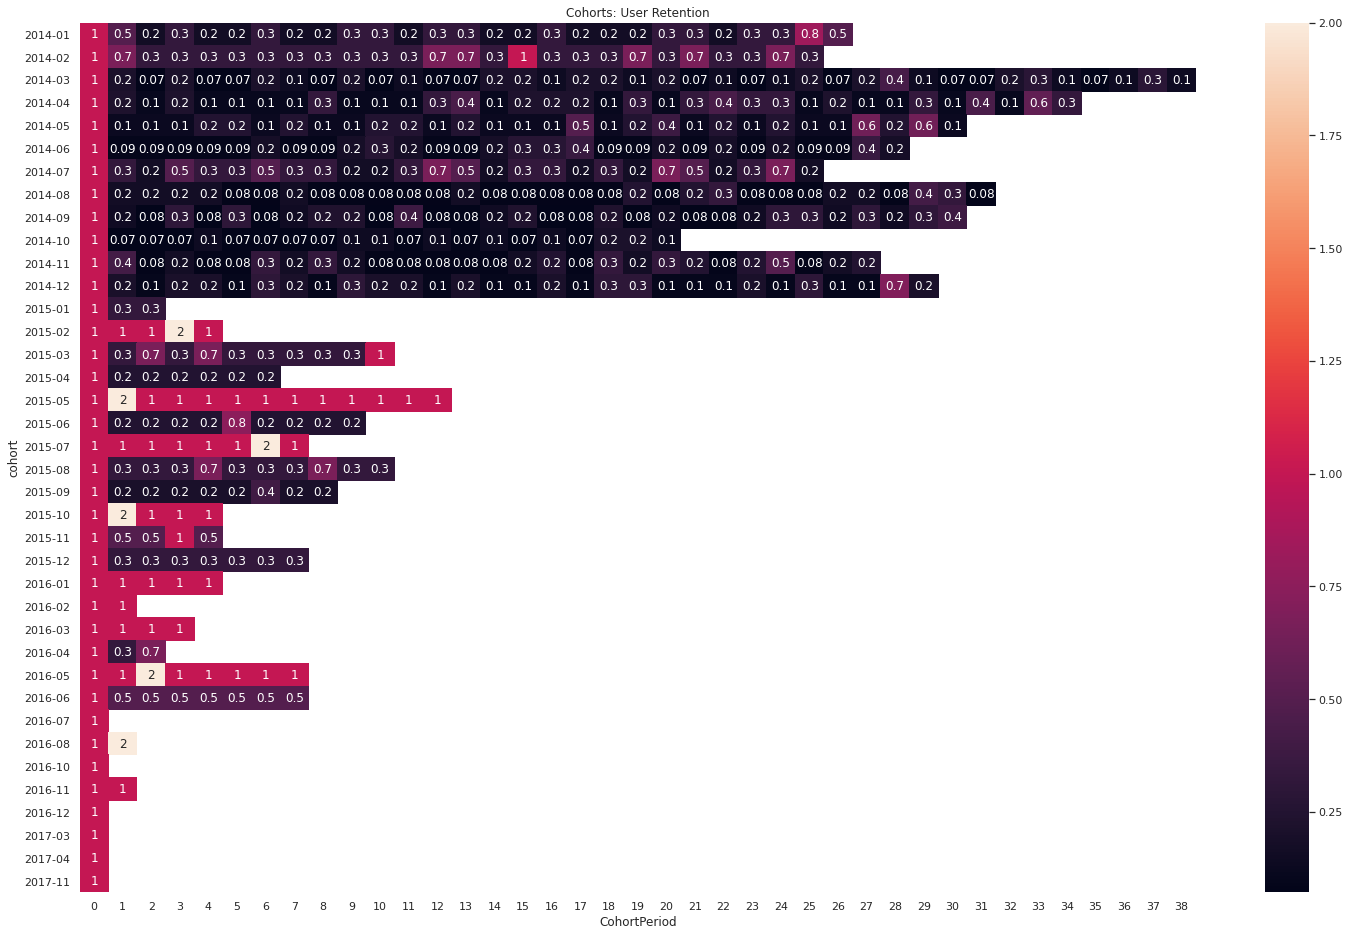

In [102]:
retention_calc(df[df['cohort'].str.contains('2017|2016|2015|2014') & (df['ship_mode'] == 'Second') ],figx=25,figy=16 )

В доставке 2 классом после 2014 года ретеншн во многих когортах вырос. Но длительность когорт не большая.

cohort,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-10,2016-11,2016-12,2017-03,2017-04,2017-11
CohortPeriod,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.333333,1.0,0.5,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,0.666667,2.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,NaN,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


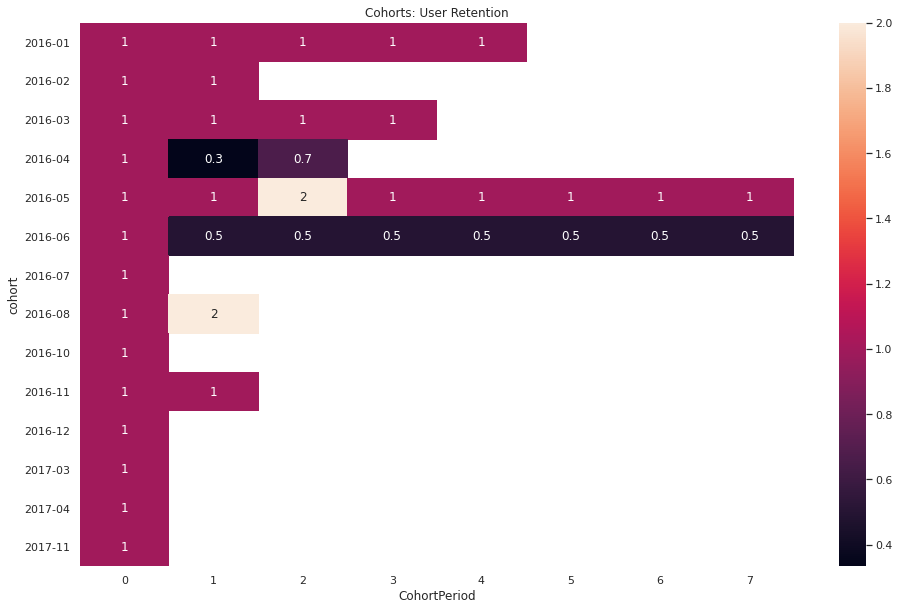

In [108]:
retention_calc(df[df['cohort'].str.contains('2017|2016') & (df['ship_mode'] == 'Second') ])

В доставке 2 классом в 2016 и 2017 годах ретенш высокий первые месяцы, но после первого сильно падает (до нуля). Нужно работать над возвращение пользователей

### First

cohort,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2016-05,2016-06,2016-07,2016-08,2016-10,2016-11,2016-12,2017-03,2017-06,2017-11
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.0,1.0,1.000000,1.000000,1.000,1.000000,1.0,1.000000,1.000,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.142857,0.2,0.4,0.142857,0.111111,0.125,0.285714,0.4,0.250000,0.125,...,0.333333,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
2,0.142857,0.2,0.2,0.142857,0.111111,0.125,0.142857,0.2,0.083333,0.375,...,0.333333,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,0.142857,0.2,0.2,0.285714,0.111111,0.500,0.142857,0.4,0.166667,0.250,...,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.142857,0.2,0.2,0.142857,0.222222,0.125,0.428571,0.2,0.083333,0.250,...,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.142857,0.2,0.2,0.285714,0.222222,0.125,0.142857,0.2,0.083333,0.125,...,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.142857,0.2,0.2,0.428571,0.444444,0.125,0.142857,0.4,0.083333,0.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.142857,0.2,0.6,0.142857,0.333333,0.375,0.142857,0.4,0.250000,0.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.142857,0.2,0.4,0.142857,0.111111,0.125,0.142857,0.2,0.083333,0.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


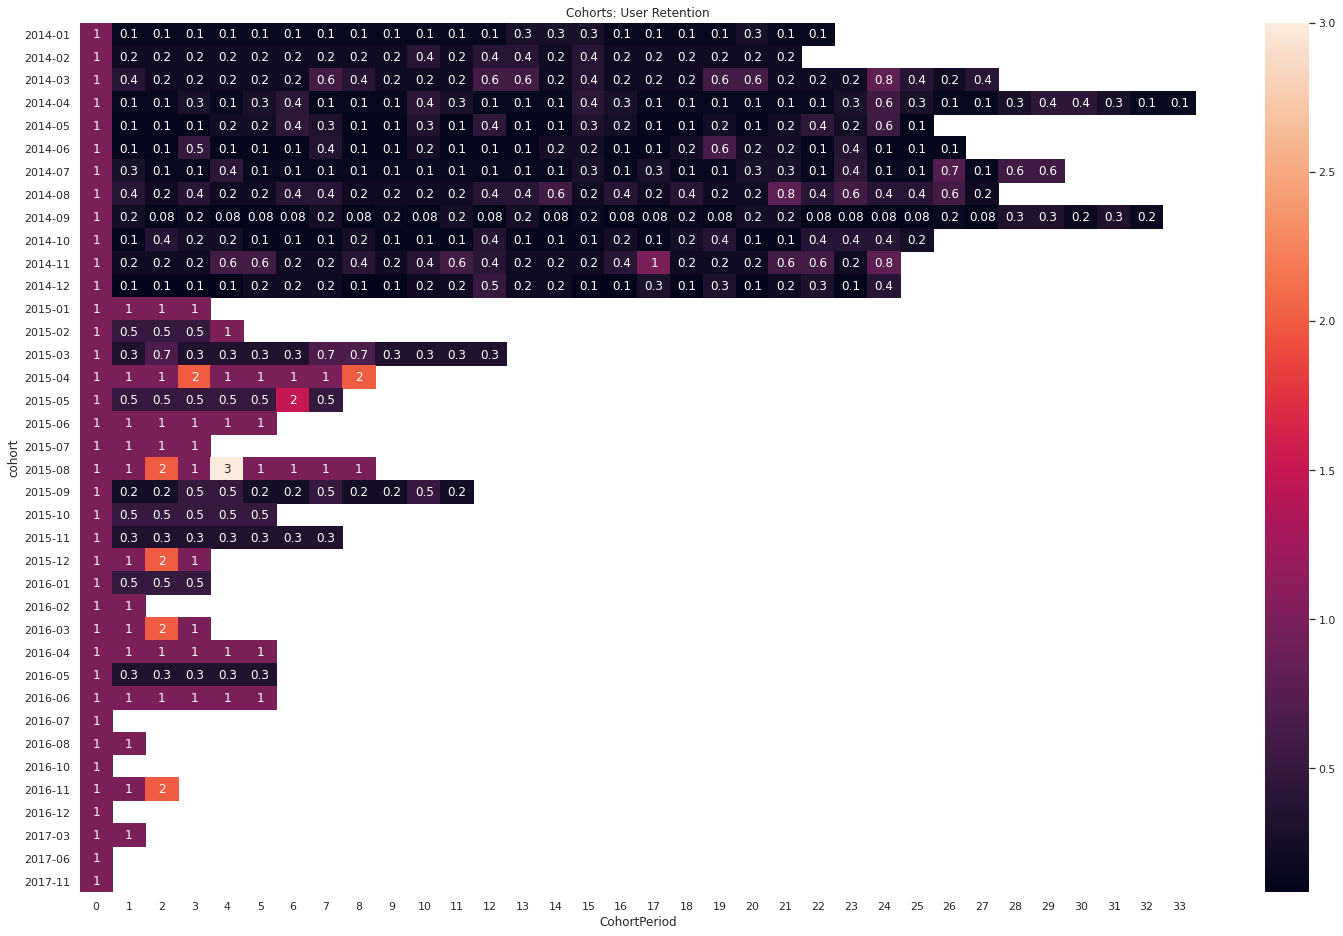

In [110]:
retention_calc(df[df['cohort'].str.contains('2017|2016|2015|2014') & (df['ship_mode'] == 'First') ],figx=25,figy=16 )

В доставке первым классом после 2014 года вырос ретенш, но длителность когорт уменьшилась . Нужно работать над возвращением пользователей после некоторой длительность (1-4 месяцеа)

cohort,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-10,2016-11,2016-12,2017-03,2017-06,2017-11
CohortPeriod,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.5,1.0,1.0,1.0,0.333333,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
2,0.5,NaN,2.0,1.0,0.333333,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,0.5,NaN,1.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


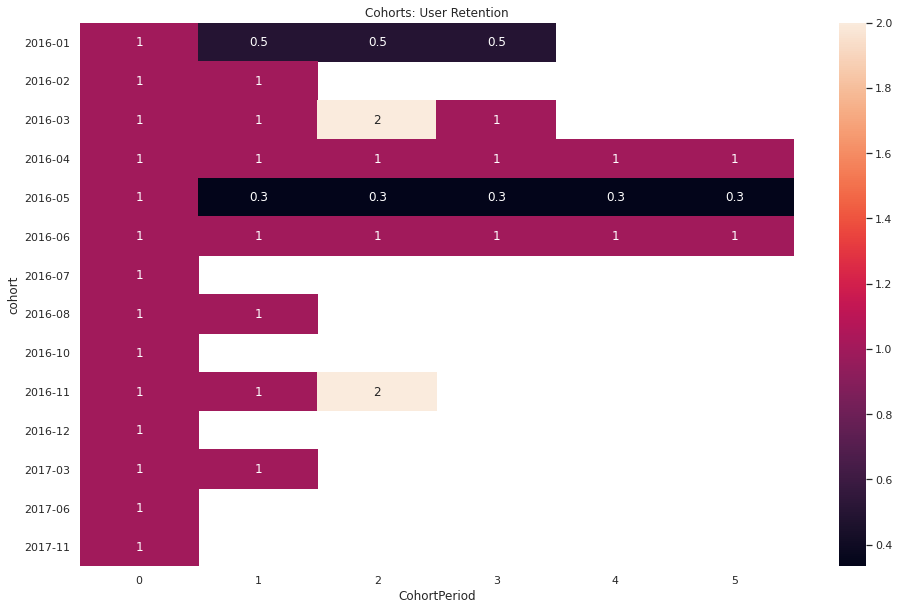

In [111]:
retention_calc(df[df['cohort'].str.contains('2017|2016') & (df['ship_mode'] == 'First') ])

В доставке первым классом в 2016 и 2017 годах ретеншн высокий как минимум несколько месяцев. При этом в 2017 году несколько когорт сразу упали в 0. Качество доставки ухудшилось видимо

### 'Same Day'

cohort,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2015-08,2015-09,2015-10,2015-11,2015-12,2016-02,2016-03,2016-06,2016-08,2016-11
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.00,1.000000,1.000000,1.000000,1.00,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,0.2,0.5,0.25,0.333333,0.333333,0.333333,0.25,0.2,...,1.0,1.0,0.5,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2,1.0,1.0,0.2,0.5,0.50,0.333333,0.333333,0.333333,0.25,0.2,...,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN
3,1.0,1.0,0.2,0.5,0.25,0.666667,0.333333,0.333333,0.50,0.4,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,0.4,0.5,0.25,0.333333,0.333333,0.333333,0.50,0.2,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,2.0,NaN,0.2,0.5,0.25,0.333333,0.333333,0.666667,0.50,0.2,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,0.2,0.5,0.25,0.333333,0.333333,0.666667,0.50,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,NaN,0.2,0.5,0.50,0.333333,0.333333,0.333333,0.25,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.4,0.5,0.25,0.333333,0.666667,0.333333,0.25,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


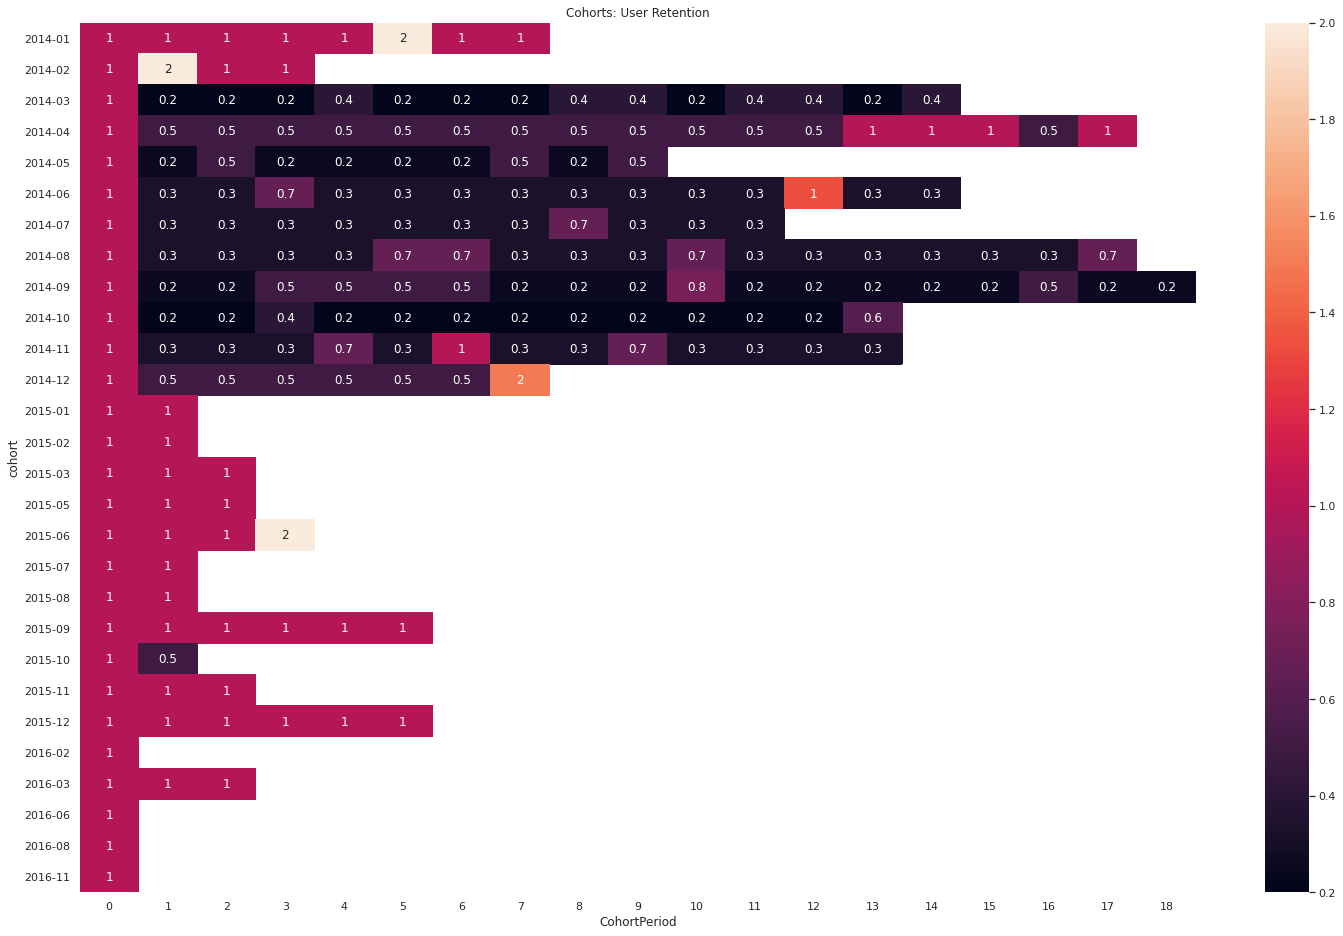

In [113]:
retention_calc(df[df['cohort'].str.contains('2017|2016|2015|2014') & (df['ship_mode'] == 'Same Day') ],figx=25,figy=16 )

При доставке в тот же день до 2014 года люди возвращаются достаточно долго, но по 30%  
После 2014 года если возвращаются, то неск месяцев все, а потом сразу никто. Явно проблемы с некоторыми доставками

cohort,2016-02,2016-03,2016-06,2016-08,2016-11
CohortPeriod,,,,,
0,1.0,1.0,1.0,1.0,1.0
1,NaN,1.0,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN


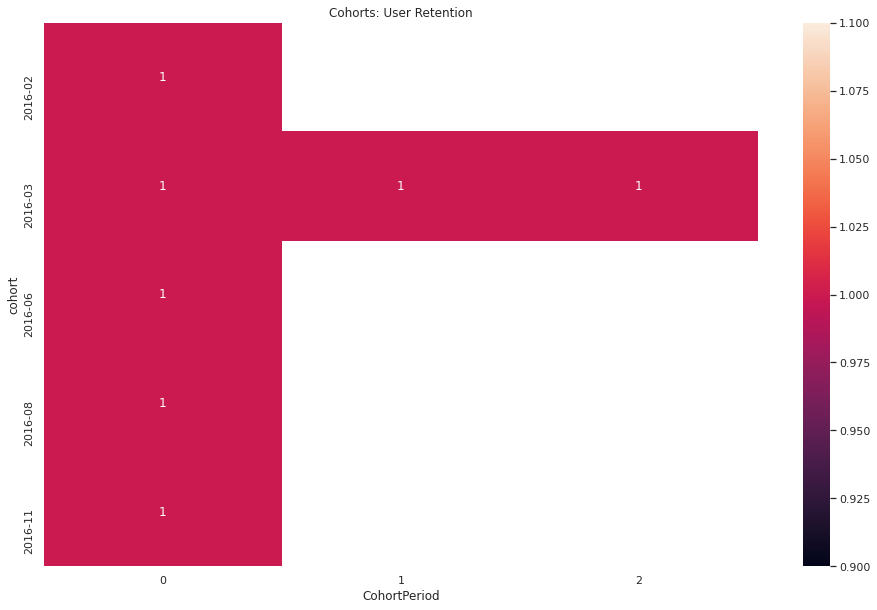

In [116]:
retention_calc(df[df['cohort'].str.contains('2017|2016') & (df['ship_mode'] == 'Same Day') ])

В 2017 году вообще никто не заказывал доставкой в тот же день. Это проблема

# Вывод

Да после 2014 года есть значительно изменение в бизнесе. Характер ретеншена изменился. Если раньше польлователи возвращались долго и примерно по 30% то после этого пользователей удается удержать менее долгий период. При этом на первых этапах пользователи хорошо возвращаются

Стандартная доставка не такая уж и хорошая: ретеншен после неё низкий во все годы. Другие виды доставок работают лучше, чем она. 

Проблемы с доставкой имеются: например доставкой в тот же день в 2017 году никто не пользуется. Что с ней стало?  

Поскольку у нас пользователи теперь плохо возвращаютя уже на 2-5 месяца , то нужно пытаться их вернуть маркетинговыми акциями. 